In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
# load telco customer churn dataset
df_teco=pd.read_csv('telco_churn.csv')
df_teco.head()


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [184]:
df_teco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   object 
 4   Partner           5043 non-null   object 
 5   Dependents        5043 non-null   object 
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   object 
 8   MultipleLines     4774 non-null   object 
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    4392 non-null   object 
 11  OnlineBackup      4392 non-null   object 
 12  DeviceProtection  4392 non-null   object 
 13  TechSupport       4392 non-null   object 
 14  StreamingTV       4392 non-null   object 
 15  StreamingMovies   4392 non-null   object 
 16  Contract          5043 non-null   object 


In [185]:
df_teco.describe()

,Unnamed: 0,tenure,MonthlyCharges
count,5043.000000,5043.000000,5043.000000
mean,1305.651993,32.576641,65.090214
std,801.484415,24.529807,30.068133
min,0.000000,0.000000,18.400000
25%,630.000000,9.000000,35.775000
50%,1260.000000,29.000000,70.550003
75%,1890.500000,56.000000,90.050003
max,2999.000000,72.000000,118.650002


<Axes: xlabel='Churn', ylabel='count'>

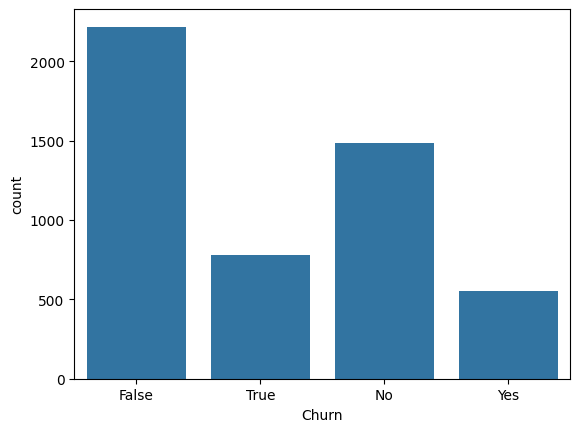

In [186]:
sns.countplot(x='Churn',data=df_teco)

In [187]:
df_teco.fillna(df_teco.select_dtypes(include='number').mean(), inplace=True)

In [188]:
df_teco.drop(['customerID'],axis=1,inplace=True)
df_teco.drop(['Unnamed: 0'],axis=1,inplace=True)

In [195]:
df_teco['TotalCharges']=pd.to_numeric(df_teco['TotalCharges'],errors='coerce')
df.dropna(inplace=True)

In [190]:
df_teco.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [197]:
df_teco = pd.get_dummies(df_teco, drop_first=True)


In [198]:
X = df.drop('Churn_True', axis=1)
y = df['Churn_True']

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [200]:
scalar=StandardScaler()
X=scalar.fit_transform(X)

In [201]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
lr=LogisticRegression(max_iter=200)

lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)


In [212]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

In [213]:
print('classification report of logistic regression\n')
print(classification_report(y_test,lr_pred))
print('classification report of knn clasification')
print(classification_report(y_test,knn_pred))

classification report of logistic regression

              precision    recall  f1-score   support

       False       0.91      0.93      0.92       675
        True       0.67      0.60      0.64       149

    accuracy                           0.88       824
   macro avg       0.79      0.77      0.78       824
weighted avg       0.87      0.88      0.87       824

classification report of knn clasification
              precision    recall  f1-score   support

       False       0.91      0.91      0.91       675
        True       0.58      0.57      0.57       149

    accuracy                           0.85       824
   macro avg       0.74      0.74      0.74       824
weighted avg       0.85      0.85      0.85       824



In [215]:
print('confusion report of logistic regression\n')
print(confusion_matrix(y_test,lr_pred))
print('confusion report of knn clasification\n')
print(confusion_matrix(y_test,knn_pred))

confusion report of logistic regression

[[631  44]
 [ 59  90]]
confusion report of knn clasification

[[613  62]
 [ 64  85]]
